In [81]:
import pandas as pd
import yfinance as yf
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr

# make the necessary imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm
from IPython.display import display

from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split
from statsmodels.tsa.vector_ar.vecm import coint_johansen

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
yf.pdr_override()



Indsætter tickers for de selskaber vi skal have med

In [118]:
tickers =  ['NEE','XOM','MPC','VWS.CO']

start = datetime.datetime(2013, 3, 1)
end = datetime.datetime(2023, 3, 31)

start_train='2013-03-01'
start_test='2020-01-01'
end_test='2023-3-31'
df = pdr.get_data_yahoo(tickers, start, end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [119]:
df.fillna(method='ffill', inplace=True)

In [120]:
descriptive_statistics=df.describe()
difference = df.diff(axis=0)
df_new=pd.DataFrame(difference)
df_new

,MPC,NEE,VWS.CO,XOM
Date,,,,
2013-03-01,NaN,NaN,NaN,NaN
2013-03-04,1.746052,0.237086,-0.146484,-0.313858
2013-03-05,-0.379879,0.055902,0.045211,0.431580
2013-03-06,-0.076721,0.055897,0.084998,-0.032722
2013-03-07,-0.094971,-0.044331,0.028934,-0.555813
2013-03-08,0.270290,0.042409,0.372540,0.170013
2013-03-11,-0.412754,0.003853,0.381582,0.124264
2013-03-12,0.401814,-0.208178,0.262224,0.000000
2013-03-13,-0.789013,0.125289,-0.018085,0.065365


In [85]:
descriptive_statistics.to_latex(float_format="%.2f")

df_new = df_new[1:]
df_new


,MPC,NEE,VWS.CO,XOM
Date,,,,
2013-03-04,1.746071,0.237085,-0.146484,-0.313877
2013-03-05,-0.379898,0.055901,0.045212,0.431549
2013-03-06,-0.076706,0.055898,0.084997,-0.032669
2013-03-07,-0.094982,-0.044333,0.028934,-0.555817
2013-03-08,0.270317,0.042406,0.372540,0.170002
2013-03-11,-0.412777,0.003846,0.381581,0.124233
2013-03-12,0.401829,-0.208169,0.262223,0.000000
2013-03-13,-0.789038,0.125294,-0.018083,0.065399
2013-03-14,0.317812,0.050117,-0.028937,0.372704


In [121]:
df_new = df_new.fillna(0)


In [122]:
def stationarity_test(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    cvalue = adfuller(X)[0]
    print('Critical-value of ' + X.name + '=' + str("{:.3f}".format(cvalue)))

In [123]:
stationarity_test(df_new['MPC'])
stationarity_test(df_new['NEE'])
stationarity_test(df_new['VWS.CO'])
stationarity_test(df_new['XOM'])

Critical-value of MPC=-19.941
Critical-value of NEE=-11.729
Critical-value of VWS.CO=-28.282
Critical-value of XOM=-21.779


In [124]:
df_new['MPC'].isnull().sum()  # count the number of missing values in the 'MPC' column

0

In [125]:
df_new['NEE'].isnull().sum()  # count the number of missing values in the 'MPC' column

0

In [126]:
df_new['VWS.CO'].isnull().sum()  # count the number of missing values in the 'MPC' column

0

In [127]:
df_new['XOM'].isnull().sum()  # count the number of missing values in the 'MPC' column

0

In [128]:
pd.options.display.max_rows = None  # Set the maximum number of rows to display
pd.options.display.max_columns = None  # Set the maximum number of columns to display
display x (df_new)


SyntaxError: invalid syntax (3103210391.py, line 3)

In [149]:
train_close, test_close = train_test_split(df, test_size=0.2625, shuffle=False)

In [150]:
#Define function to find cointegrated pairs from chosen tickers
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

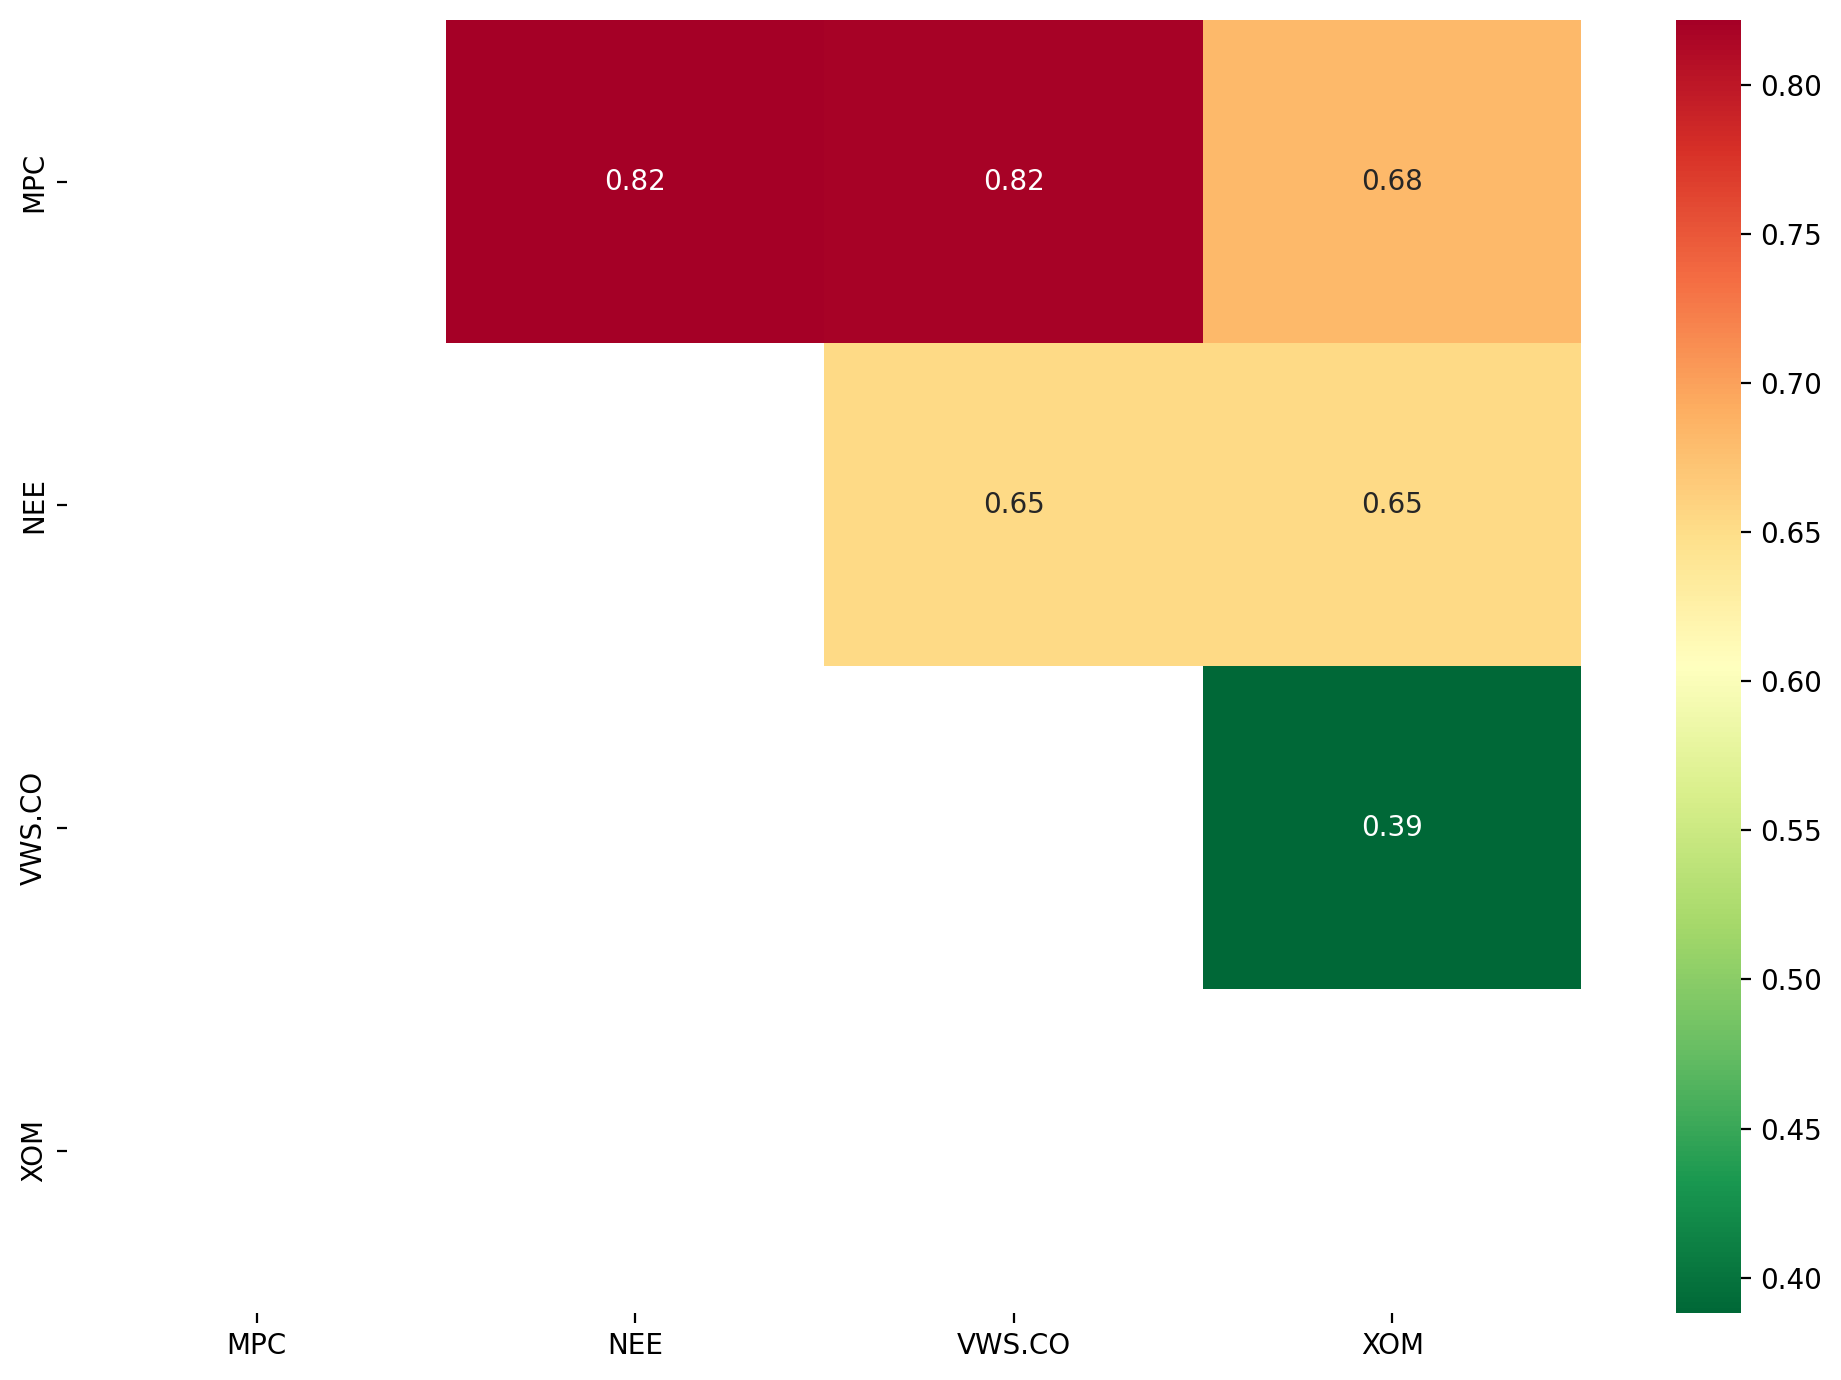

In [151]:
# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
pvalues, pairs = find_cointegrated_pairs(train_close[['MPC','NEE','VWS.CO','XOM']])
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_close[['MPC','NEE','VWS.CO','XOM']].columns,
                yticklabels = df[['MPC','NEE','VWS.CO','XOM']].columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
plt.tight_layout()
plt.savefig('co_matrix', dpi=300) 

In [148]:
#Estimation of the Johansen test
keys=train_close.keys()
for i in [0,1,5]:
    jh_results = coint_johansen(train_close.iloc[:,[i,3]], det_order=0, k_ar_diff=1)
    print(keys[i])
    print(jh_results.lr1)# dim = (n,) Trace statistic
#here we compare the maximum eigenvalue statistics with the critical values of this and find the most co-integrating pair.

MPC
[6.92919782 3.0268584 ]
NEE
[12.70042142  1.02543219]


IndexError: positional indexers are out-of-bounds

In [141]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1,res.eig],
                          index=['max_eig_stat',"trace_stat","Eigen_values"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')


In [142]:
joh_output(jh_results)

   max_eig_stat  trace_stat  Eigen_values
0     11.674989   12.700421      0.006075
1      1.025432    1.025432      0.000535 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 



In [144]:
v1 = jh_results.evec[:, 0]
v2 = jh_results.evec[:, 1]
if jh_results.eig[0]>jh_results.eig[1]:
    beta_co=v1[1]/v1[0] # Normalizing the beta coefficient, depending on which eigenvalues are the largest. 
else:
    beta_co=v2[1]/v2[0]
print(beta_co)        

1.47346919439604


First we look at a comparison between XOM and NEE

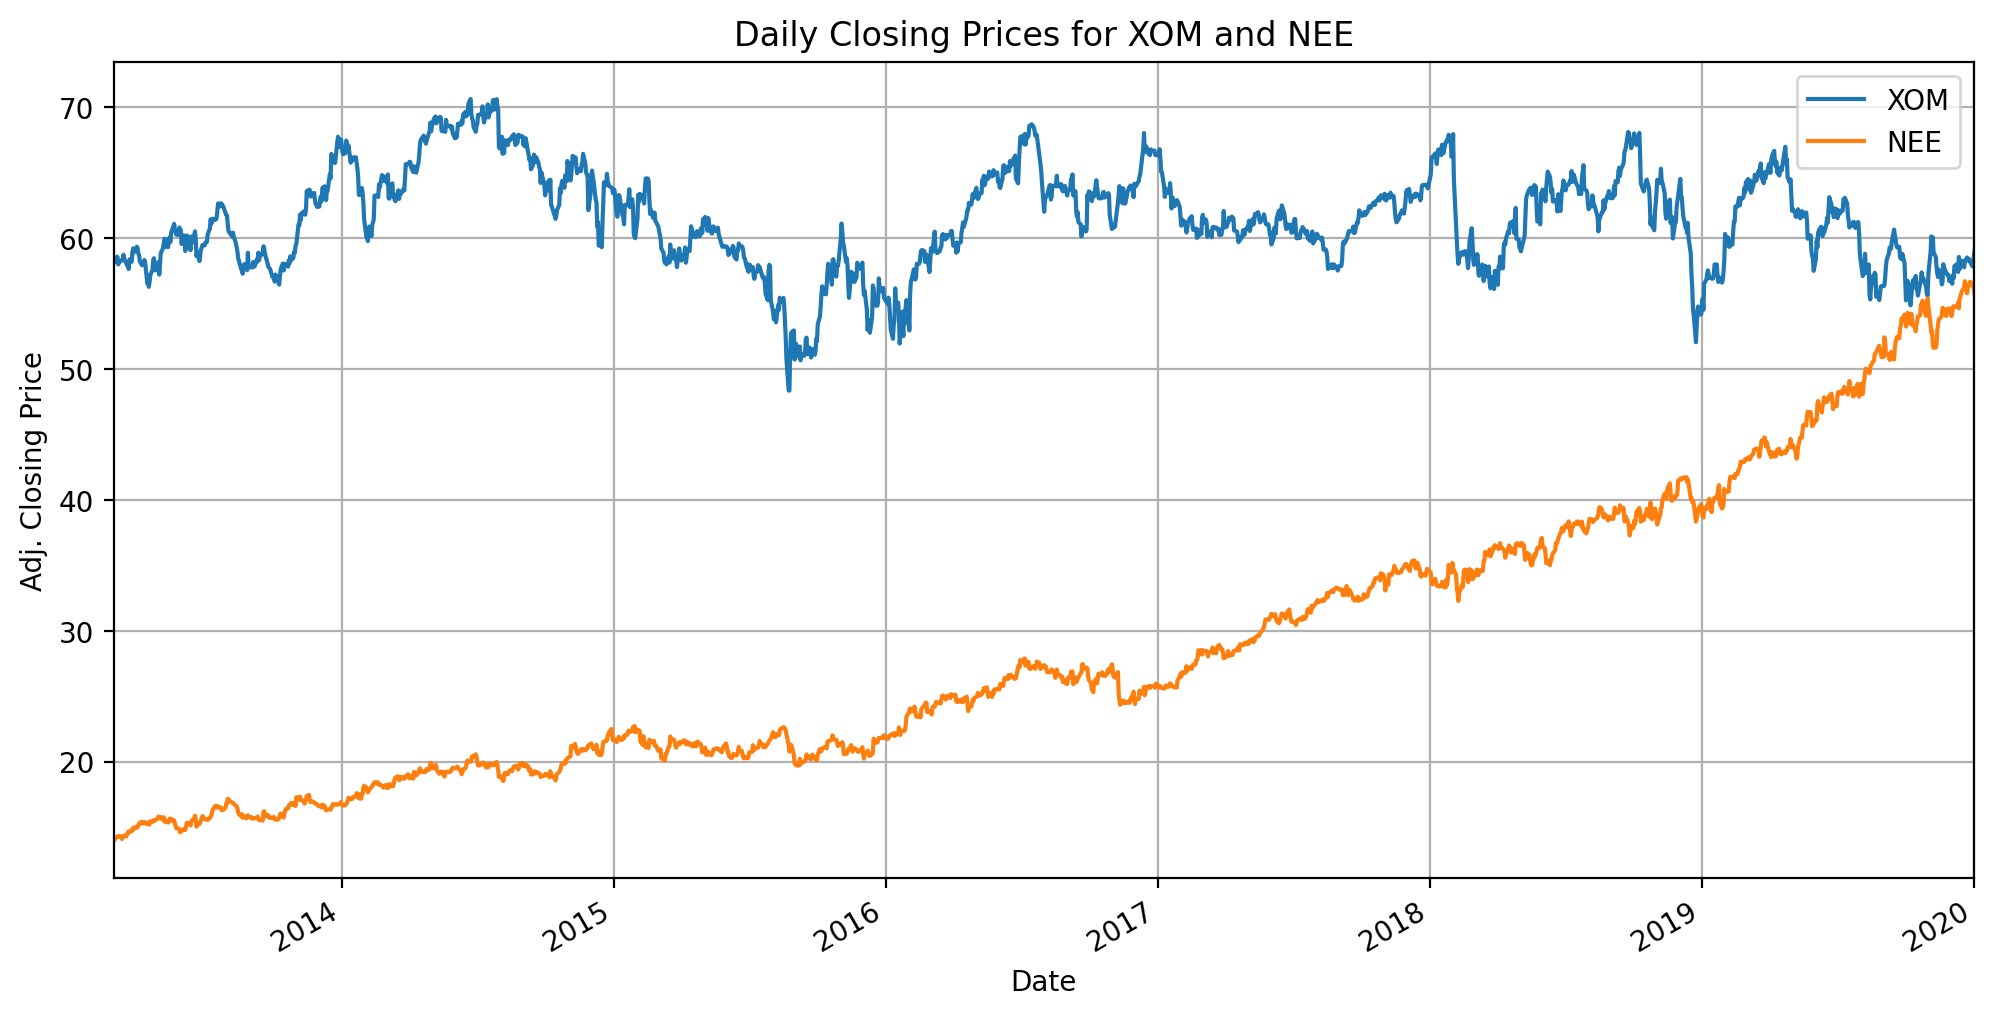

In [158]:
# final pair to test strategy (To obtain results from other promising assets, this has to be changed here)
asset1 = 'XOM'
asset2 = 'NEE'

# create a train dataframe of 2 assets
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]

# visualize closing prices
ax = train[['asset1','asset2']].plot(figsize=(12, 6), title = 'Daily Closing Prices for {} and {}'.format(asset1,asset2))
ax.set_ylabel("Adj. Closing Price")
ax.set_xlim(start_train,start_test)
ax.legend(['XOM','NEE']) #Change ticker name here as well
ax.grid(True);

In [159]:
# run OLS regression
model=sm.OLS(train.asset2, train.asset1).fit()



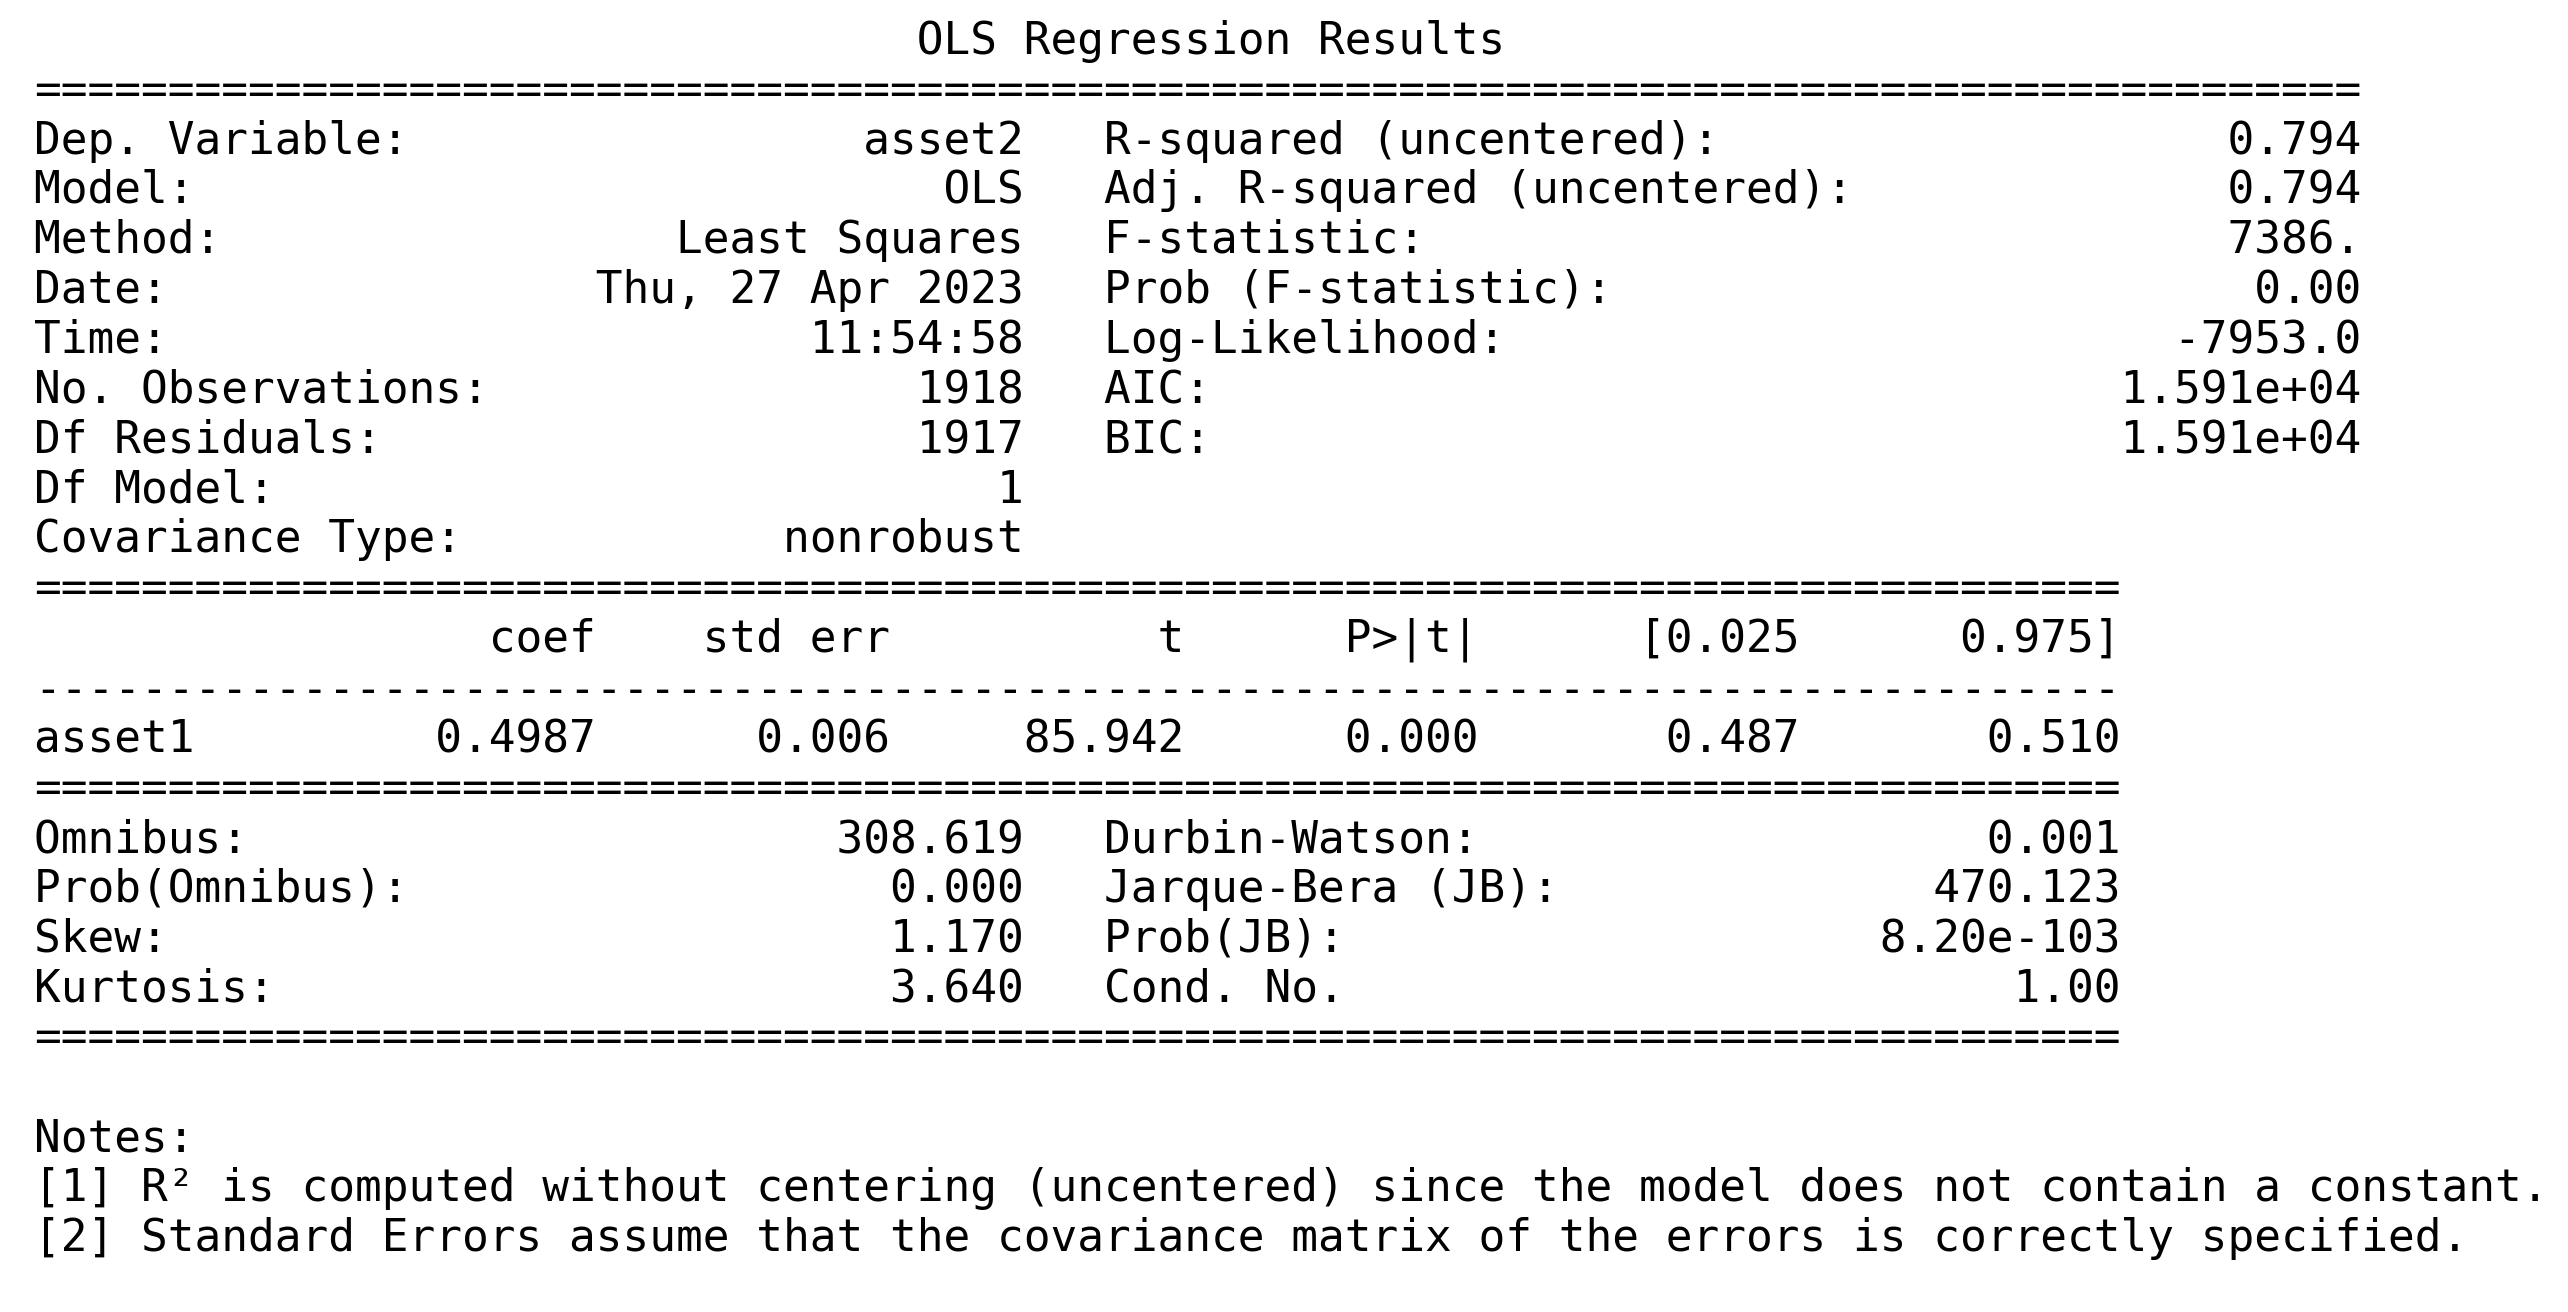

In [160]:
# print regression summary results
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)

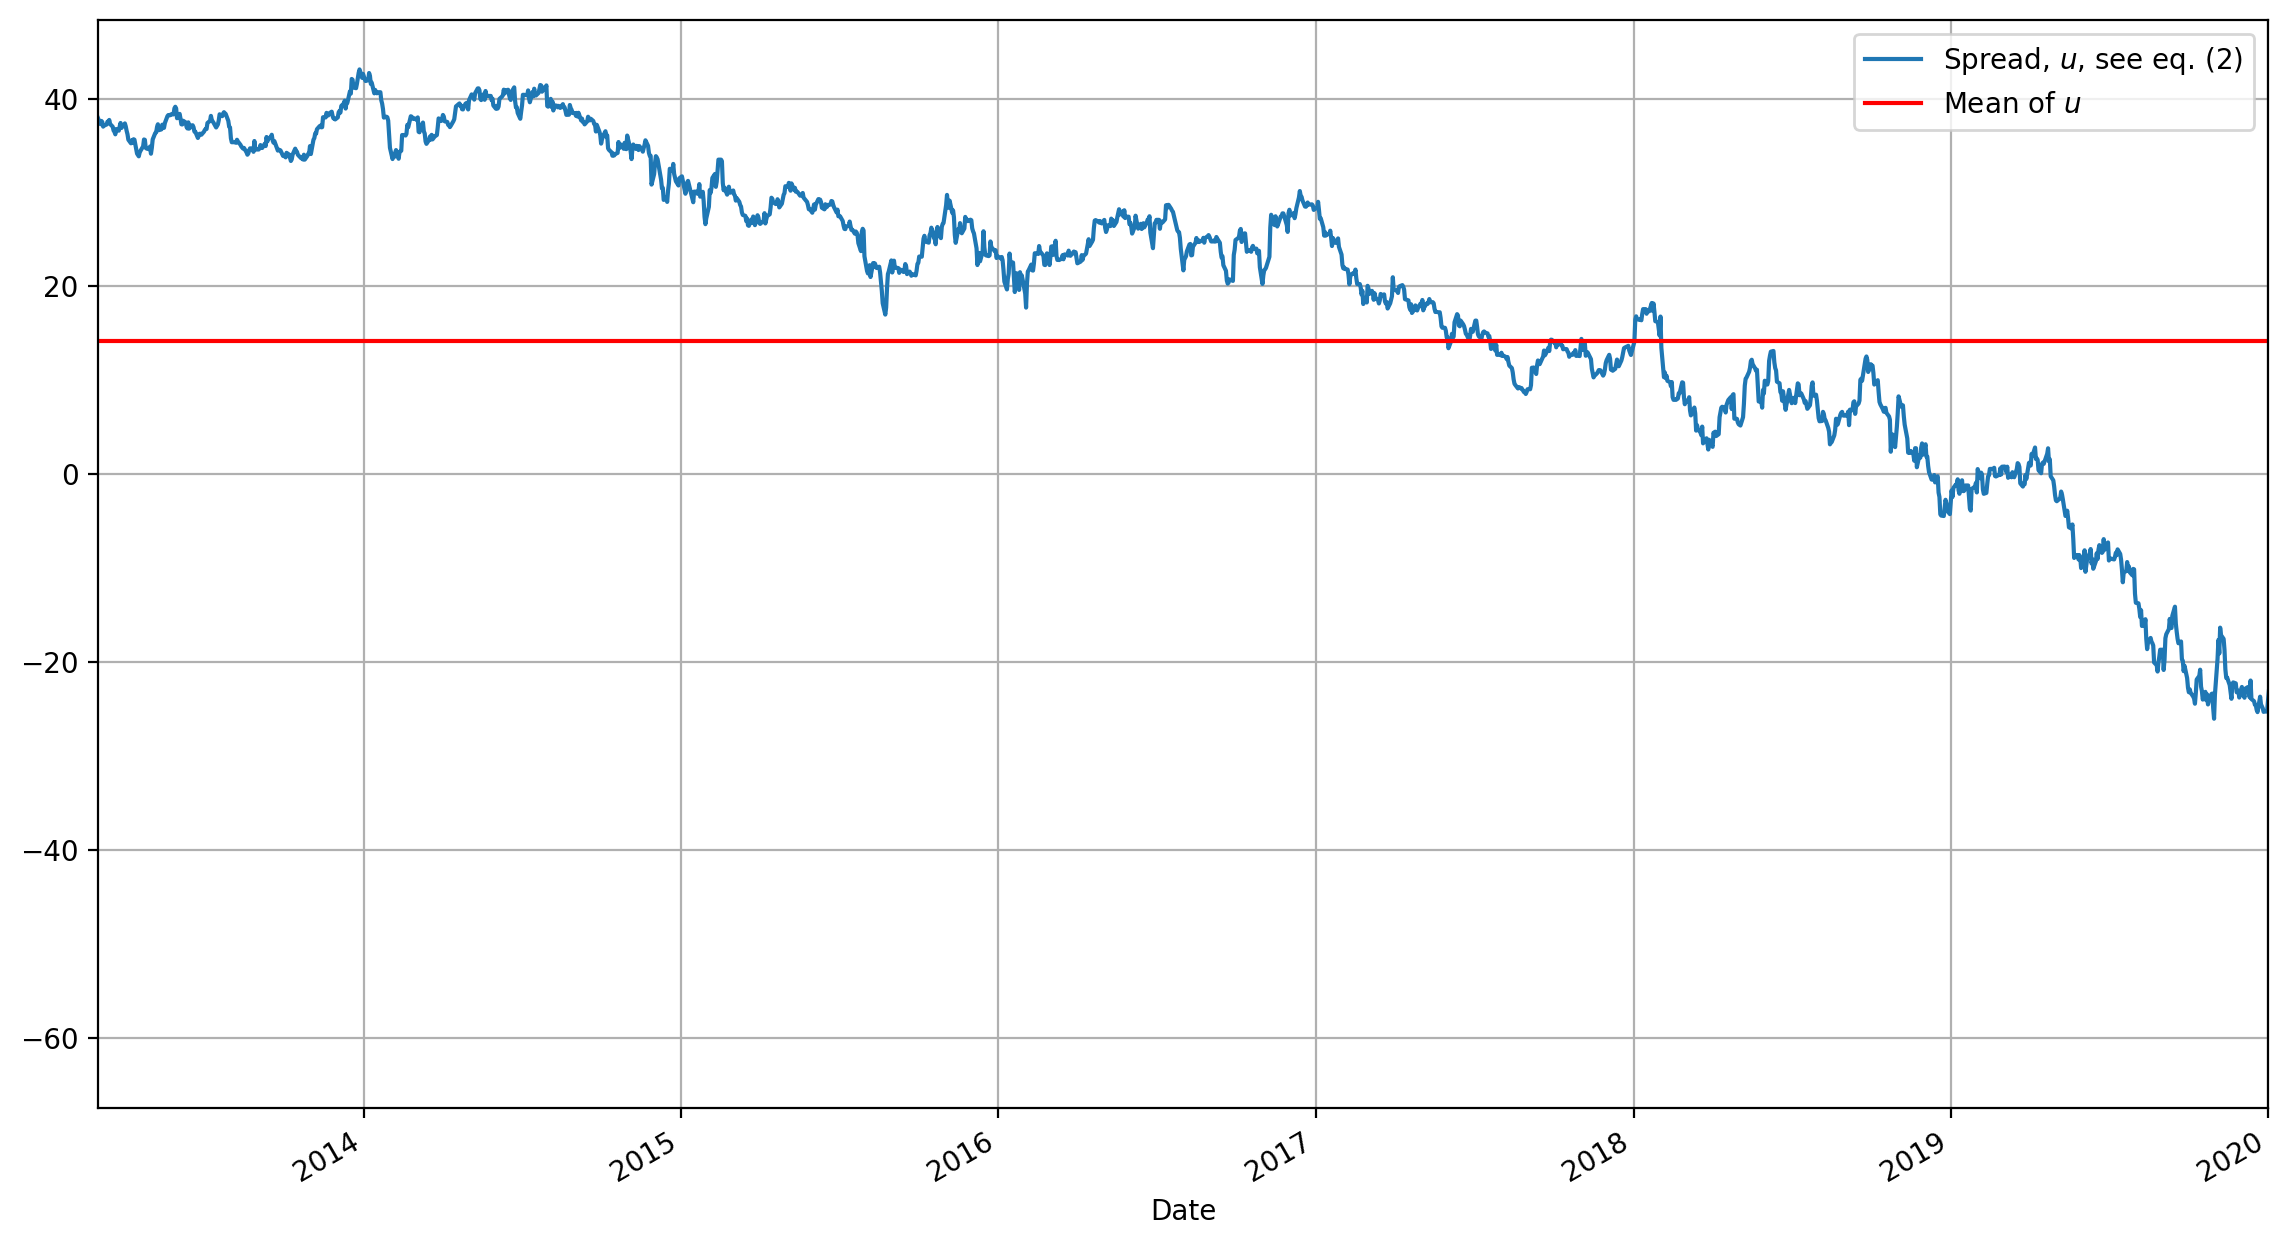

In [161]:
# calculate spread
spread = train.asset1 - beta_co * train.asset2
mean=np.mean(spread)
# Plot the spread
ax = spread.plot(figsize=(14, 8))
ax.axhline(y = np.mean(spread), color = 'r', linestyle = '-')
ax.set_xlim(start_train,start_test)
ax.legend(['Spread, $u$, see eq. (2)','Mean of $u$'])
ax.grid(True);
plt.savefig('spread_'+asset2+asset1, dpi=300, orientation='landscape')

In [162]:
np.mean(spread)

14.133769905399934

Augmented Dickey-Fuller test

In [163]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(spread, maxlag = 1)
print('P Value = ', adf[1])

P Value =  0.9983127882850914


In [164]:
# calculate z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)

# create a dataframe for trading signals
signals = pd.DataFrame()
signals['asset1'] = df[asset1]
signals['asset2'] = df[asset2]
ratios = signals.asset1/signals.asset2
# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + 1.5*np.std(signals['z'])
signals['revert upper limit']= np.mean(signals['z']) + 0.5*np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - 1.5*np.std(signals['z'])
signals['revert lower limit']= np.mean(signals['z']) - 0.5*np.std(signals['z'])

In [165]:
# create signal - if z-score is greater than upper limit(short) or between upper and revert upper limit (hold) else long
signals['signals1'] = pd.Series(dtype='int')
n = signals.shape[0]
for i in range(n):
    if signals['z'][i]>signals['z upper limit'][i] and signals['z'][i] > signals['revert upper limit'][i]:
        signals['signals1'][i]=-1 
    elif signals['z'][i] < signals['z upper limit'][i] and signals['z'][i] > signals['revert upper limit'][i]:
        signals['signals1'][i]=0
    elif signals['z'][i] < signals['z upper limit'][i] and signals['z'][i] < signals['revert upper limit'][i]:                                                     
        signals['signals1'][i]=1
    elif signals['z'][i] > signals['z lower limit'][i] and signals['z'][i] > signals['revert lower limit'][i]:
        signals['signals1'][i]=1                 
    elif signals['z'][i] > signals['z lower limit'][i] and signals['z'][i] < signals['revert lower limit'][i]:
        signals['signals1'][i]=0
    elif signals['z'][i] < signals['z lower limit'][i] and signals['z'][i] < signals['revert lower limit'][i]:                                                     
        signals['signals1'][i]=-1 
    else:
        signals['signals1'][i]=0

In [166]:
# we take the first order difference to obtain portfolio position in that stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

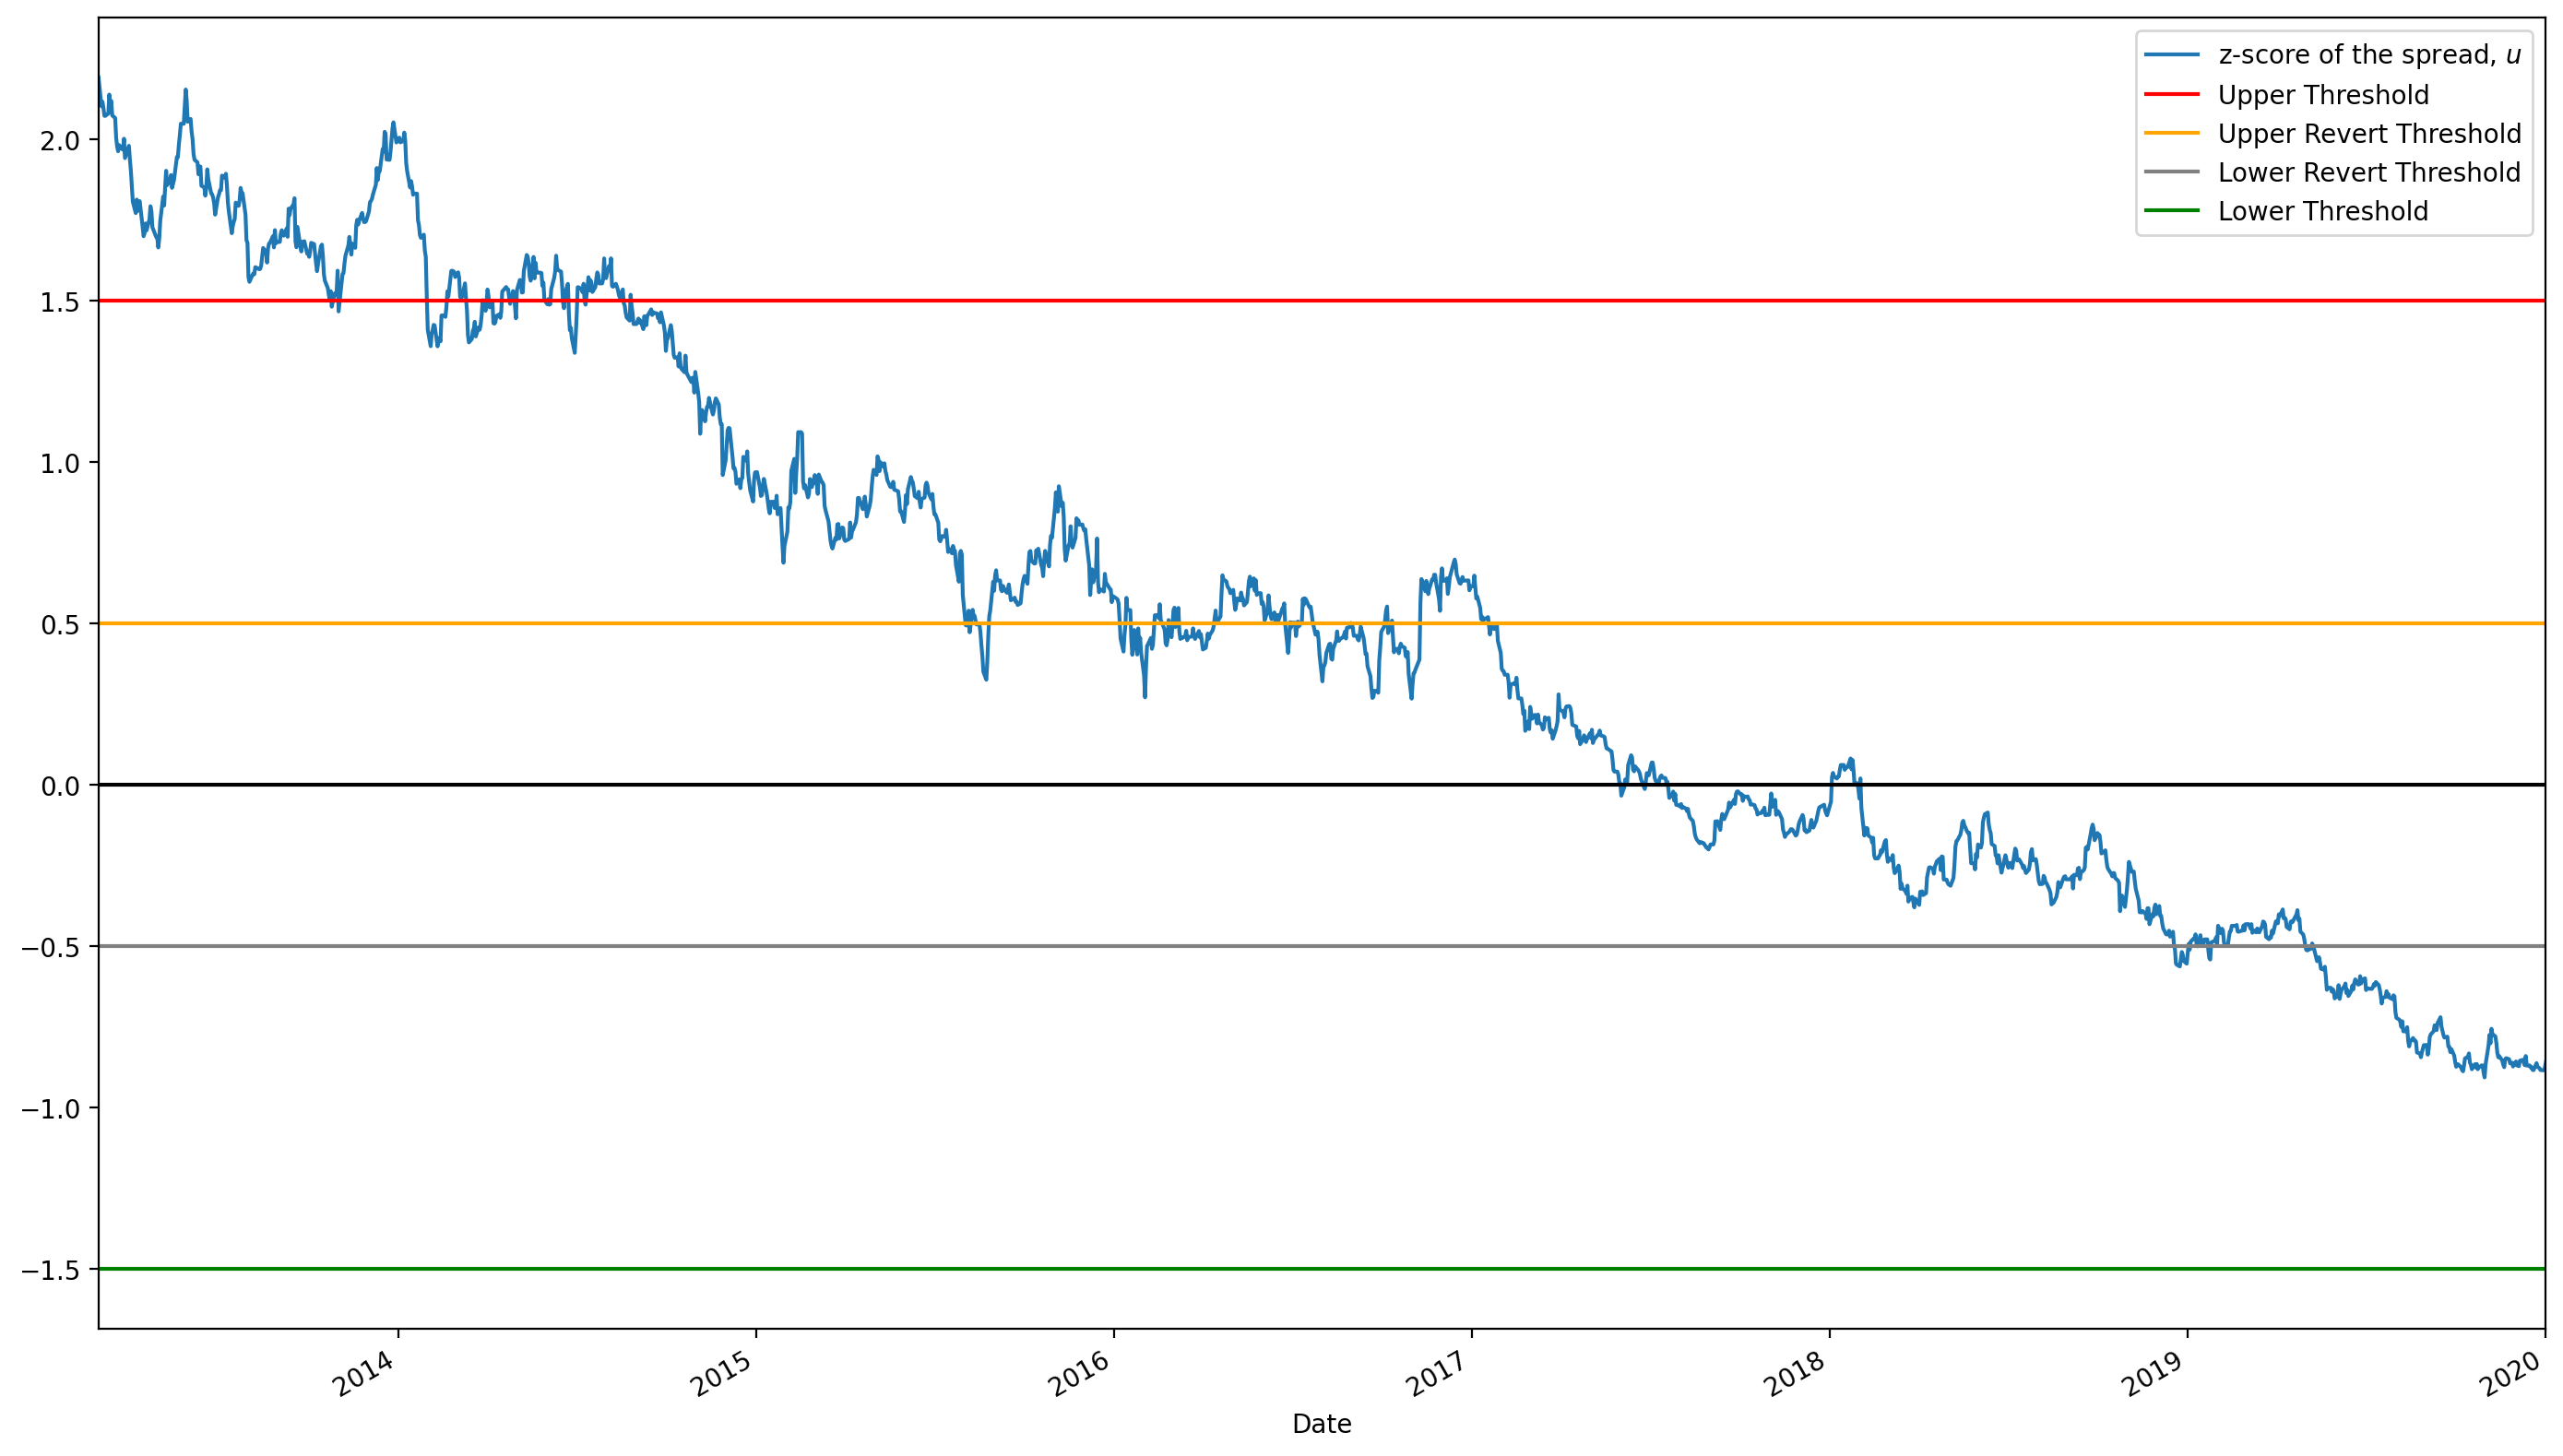

In [167]:
# visualize z-score and upper and lower thresholds   
signals['z'].plot(label="z-score of the spread, $u$", figsize=(14,8))
plt.axhline(signals['z'].mean(),color="black")
plt.axhline(signals['z upper limit'].mean(), color="red", label="Upper Threshold")
plt.axhline(signals['revert upper limit'].mean(), color="orange", label="Upper Revert Threshold")
plt.axhline(signals['revert lower limit'].mean(), color="grey", label="Lower Revert Threshold")
plt.axhline(signals['z lower limit'].mean(), color="green", label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.xlim(start_train,start_test)
plt.savefig('zscore'+asset2+asset1, dpi=300)

In [168]:
signals['positions1'].tail()

Date
2023-03-24    0.0
2023-03-27    0.0
2023-03-28    0.0
2023-03-29    0.0
2023-03-30    0.0
Name: positions1, dtype: float64

In [169]:
ratios=df[asset1]-beta_co*df[asset2]
std = ratios.rolling(window=30, center=False).std()
ma_5=ratios.rolling(window=5, center=False).mean()
ma_30=ratios.rolling(window=30, center=False).mean()
zscore = (ma_5 - ma_30)/std

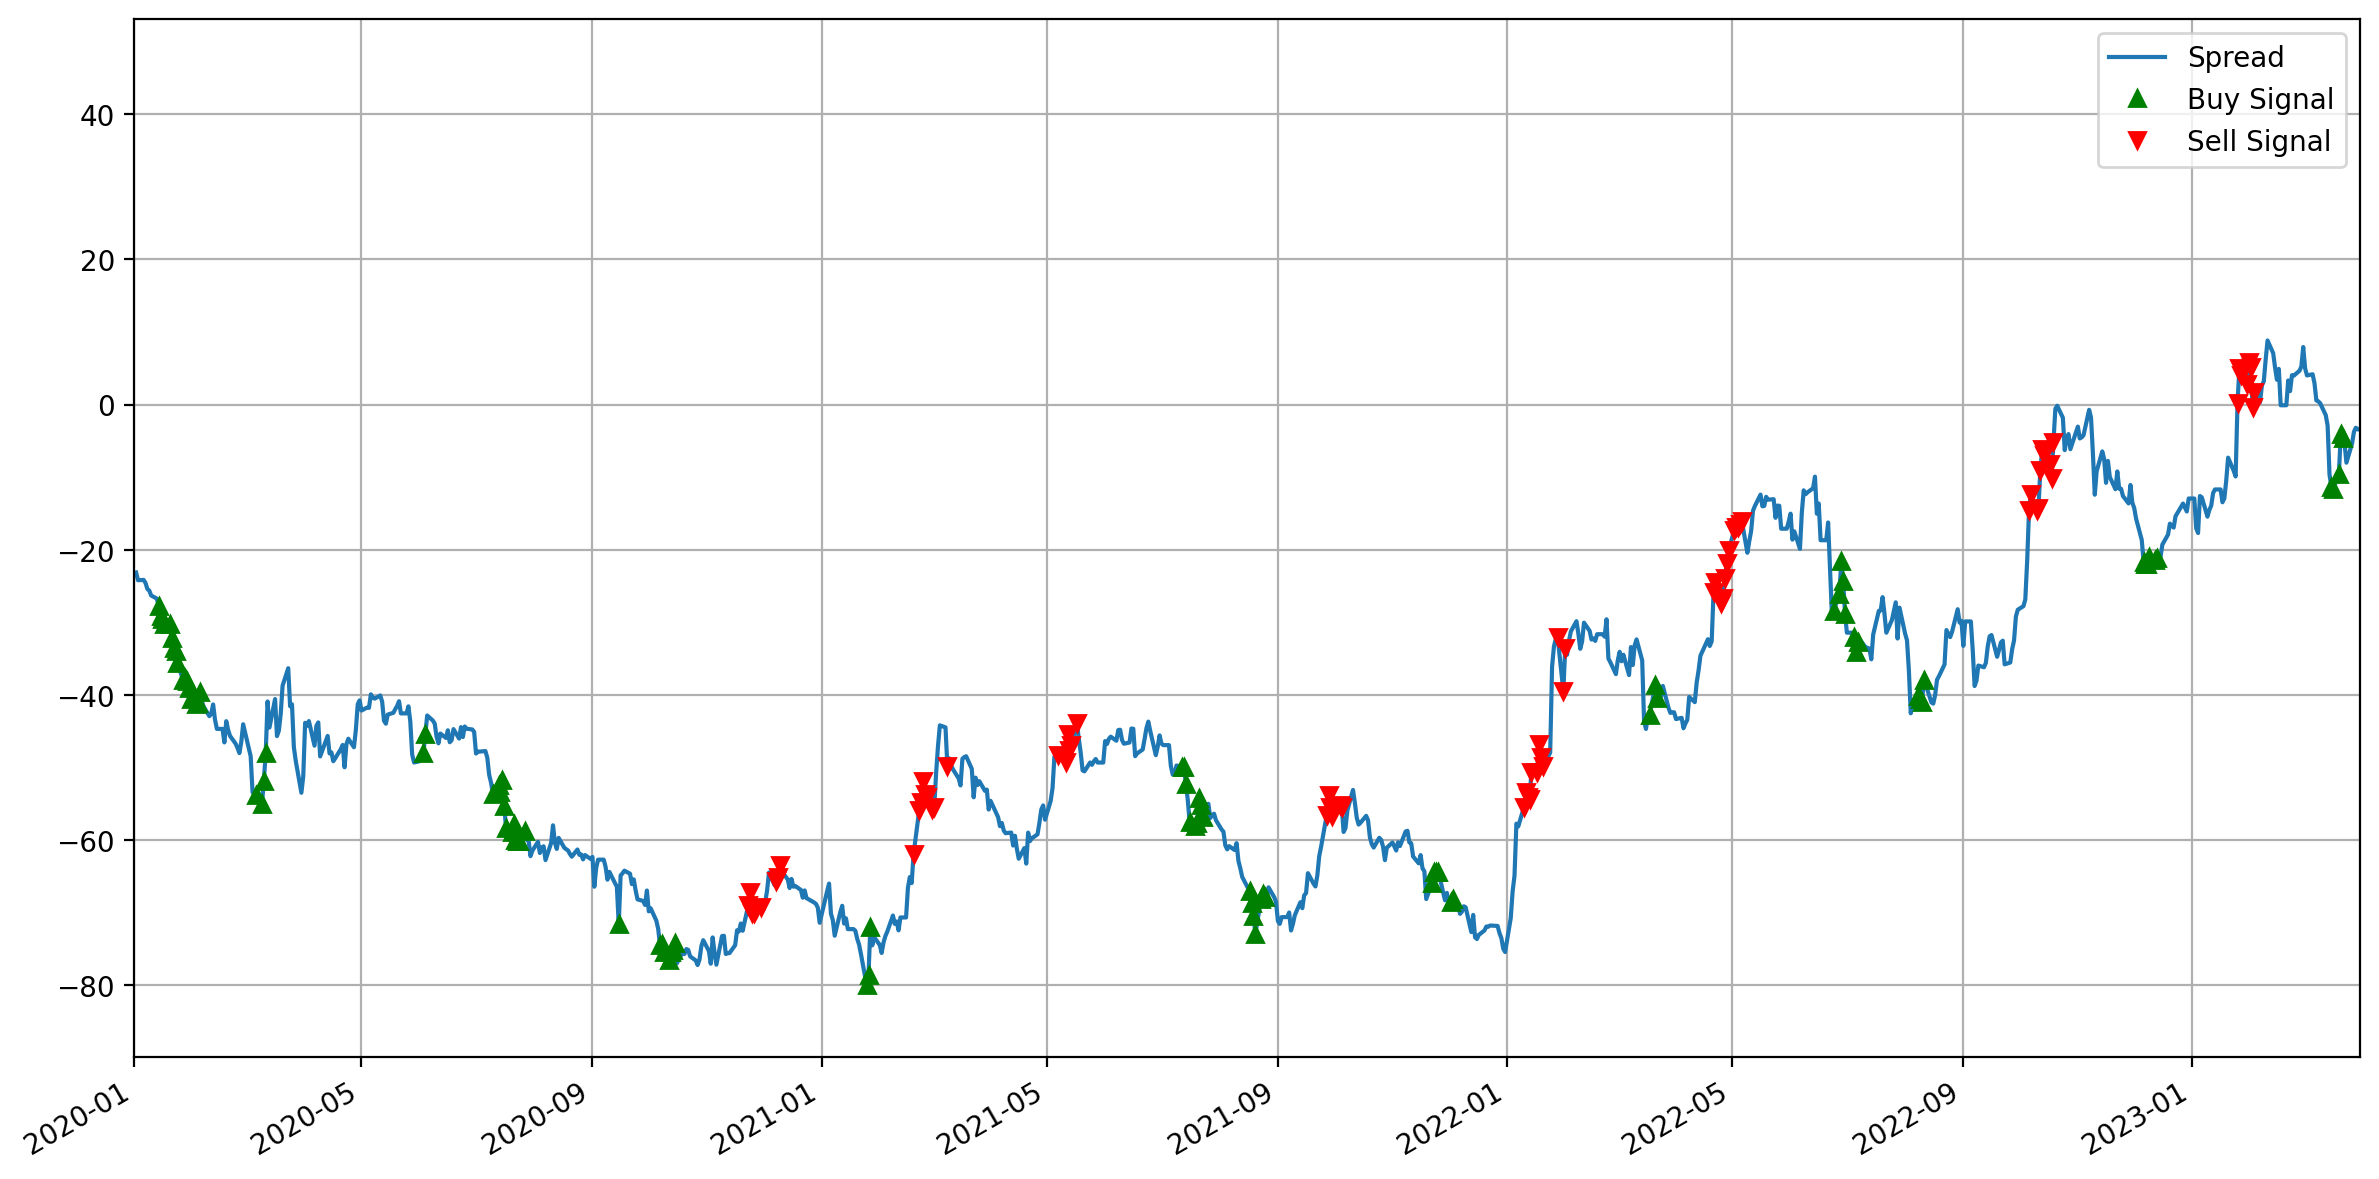

In [170]:
plt.figure(figsize=(12,6))

ratios[start_test:].plot()
buy = ratios.copy()
sell = ratios.copy()
#These are just set to -100 for visual reasons, such that it does not enter the graph when nothing should be done. 
buy[zscore>-1.5] = -100
buy[zscore>-0.5] = -100
sell[zscore<1.5] = -100
sell[zscore<0.5] = -100
buy[start_test:].plot(color='g', linestyle='None', marker='^')
sell[start_test:].plot(color='r', linestyle='None', marker='v')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min()-10, ratios.max()+10))
plt.xlim(start_test,end_test)
plt.xlabel(None)
plt.legend(['Spread', 'Buy Signal', 'Sell Signal'])
plt.grid(True)
plt.tight_layout()
plt.savefig('Strategy'+asset2+asset1, dpi=300)

# Portfolio Profit and Loss calculations

In [171]:
# initial capital to calculate the actual pnl
initial_capital = 500
# shares to buy for each position
positions1 = initial_capital// max(signals['asset1'][start_test:])
positions2 = initial_capital// max(signals['asset2'][start_test:])

In [172]:
# since there are two assets, we calculate each asset Pnl separately 
# and in the end we aggregate them into one portfolio
portfolio = pd.DataFrame()
portfolio['asset1'] = signals['asset1'][start_test:] 
portfolio['holdings1'] = signals['positions1'][start_test:].cumsum() * signals['asset1'][start_test:]  * positions1
portfolio['cash1'] = initial_capital - (signals['positions1'][start_test:] * signals['asset1'][start_test:]  * positions1).cumsum()
portfolio['total asset1'] = portfolio['holdings1'] + portfolio['cash1']
portfolio['return1'] = portfolio['total asset1'].pct_change()
portfolio['positions1'] = signals['positions1'][start_test:] 

In [173]:
# pnl for the 2nd asset
portfolio['asset2'] = signals['asset2'][start_test:] 
portfolio['holdings2'] = signals['positions2'][start_test:] .cumsum() * signals['asset2'][start_test:]  * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'][start_test:] * signals['asset2'][start_test:]  * positions2).cumsum()
portfolio['total asset2'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total asset2'].pct_change()
portfolio['positions2'] = signals['positions2'][start_test:] 

In [174]:
# total pnl and z-score
portfolio['total asset'] = portfolio['total asset1'] + portfolio['total asset2']
portfolio['total return'] = portfolio['return1'] + portfolio['return2']
portfolio = portfolio.dropna()
portfolio.tail(20)

,asset1,holdings1,cash1,total asset1,return1,positions1,asset2,holdings2,cash2,total asset2,return2,positions2,total asset,total return
Date,,,,,,,,,,,,,,
2023-03-03,112.809998,0.0,500.0,500.0,0.0,0.0,73.830002,0.0,500.0,500.0,0.0,0.0,1000.0,0.0
2023-03-06,113.809998,0.0,500.0,500.0,0.0,0.0,74.400002,0.0,500.0,500.0,0.0,0.0,1000.0,0.0
2023-03-07,111.610001,0.0,500.0,500.0,0.0,0.0,73.750000,0.0,500.0,500.0,0.0,0.0,1000.0,0.0
2023-03-08,109.980003,0.0,500.0,500.0,0.0,0.0,74.250000,0.0,500.0,500.0,0.0,0.0,1000.0,0.0
2023-03-09,109.129997,0.0,500.0,500.0,0.0,0.0,73.760002,0.0,500.0,500.0,0.0,0.0,1000.0,0.0
2023-03-10,107.779999,0.0,500.0,500.0,0.0,0.0,73.010002,0.0,500.0,500.0,0.0,0.0,1000.0,0.0
2023-03-13,106.540001,0.0,500.0,500.0,0.0,0.0,73.290001,0.0,500.0,500.0,0.0,0.0,1000.0,0.0
2023-03-14,106.940002,0.0,500.0,500.0,0.0,0.0,74.550003,0.0,500.0,500.0,0.0,0.0,1000.0,0.0
2023-03-15,101.620003,0.0,500.0,500.0,0.0,0.0,75.519997,0.0,500.0,500.0,0.0,0.0,1000.0,0.0


In [176]:
import ffn
prices=ffn.get('XLE,SPY',start=start_test, end=end_test)
xle=prices['xle'].rebase(1000)
spy=prices['spy'].rebase(1000)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [179]:
# plot the asset value change of the portfolio and pnl along with z-score
fig = plt.figure(figsize=(14,8),)
ax = fig.add_subplot(111)

l1, = ax.plot(portfolio['total asset'], c='black')
l2, = ax.plot(xle,c='blue')
l3, = ax.plot(spy,c='grey')

ax.set_ylabel('Portfolio Value')
ax.yaxis.labelpad=20
ax.set_xlabel('Date')
ax.xaxis.labelpad=10
ax.margins(x=0)
plt.legend([l2,l3,l1],['Value, hold XLE',
                      'Value, hold SPY',
                      'Total Portfolio Value'],loc='upper left')
plt.grid(True)
plt.tight_layout();
plt.savefig('performance'+asset2+asset1, dpi=300)

In [180]:
portfolio_hold

NameError: name 'portfolio_hold' is not defined

In [181]:
#Calculate turnover:

def return_change(asset_t,asset_t1):
    return print(((asset_t1-asset_t)/asset_t1)*100)
def return_change_fee(asset_t,asset_t1,fee):
    return print(((asset_t1-asset_t-fee)/asset_t1)*100)

In [182]:
#SWN/WTI
fee_1=(initial_capital_hold//4.70)*0.02
fee_2=(initial_capital_hold//4.15)*0.02
pair_fee=55.48


pair_trading_return=return_change(portfolio.iloc[1,12],portfolio.iloc[-1,12])
hold_asset1_return=return_change(portfolio_hold.iloc[1,2],portfolio_hold.iloc[-1,2])
hold_asset2_return=return_change(portfolio_hold.iloc[1,6],portfolio_hold.iloc[-1,6])

pair_trading_return=return_change_fee(portfolio.iloc[1,12],portfolio.iloc[-1,12],pair_fee)
hold_asset1_return=return_change_fee(portfolio_hold.iloc[1,2],portfolio_hold.iloc[-1,2],fee_1)
hold_asset2_return=return_change_fee(portfolio_hold.iloc[1,6],portfolio_hold.iloc[-1,6],fee_2)

NameError: name 'initial_capital_hold' is not defined

In [183]:
#WTI/VLO
fee_1=(initial_capital_hold//4.10)*0.02
fee_2=(initial_capital_hold//81.11)*0.02
pair_fee=55.48


pair_trading_return=return_change(portfolio.iloc[1,12],portfolio.iloc[-1,12])
hold_asset1_return=return_change(portfolio_hold.iloc[1,2],portfolio_hold.iloc[-1,2])
hold_asset2_return=return_change(portfolio_hold.iloc[1,6],portfolio_hold.iloc[-1,6])

pair_trading_return=return_change_fee(portfolio.iloc[1,12],portfolio.iloc[-1,12],pair_fee)
hold_asset1_return=return_change_fee(portfolio_hold.iloc[1,2],portfolio_hold.iloc[-1,2],fee_1)
hold_asset2_return=return_change_fee(portfolio_hold.iloc[1,6],portfolio_hold.iloc[-1,6],fee_2)

NameError: name 'initial_capital_hold' is not defined

In [184]:
#SWN/VLO
fee_1=(initial_capital_hold//4.67)*0.02
fee_2=(initial_capital_hold//81.11)*0.02
pair_fee=55.48


pair_trading_return=return_change(portfolio.iloc[1,12],portfolio.iloc[-1,12])
hold_asset1_return=return_change(portfolio_hold.iloc[1,2],portfolio_hold.iloc[-1,2])
hold_asset2_return=return_change(portfolio_hold.iloc[1,6],portfolio_hold.iloc[-1,6])

pair_trading_return=return_change_fee(portfolio.iloc[1,12],portfolio.iloc[-1,12],pair_fee)
hold_asset1_return=return_change_fee(portfolio_hold.iloc[1,2],portfolio_hold.iloc[-1,2],fee_1)
hold_asset2_return=return_change_fee(portfolio_hold.iloc[1,6],portfolio_hold.iloc[-1,6],fee_2)

NameError: name 'initial_capital_hold' is not defined

In [185]:
#SWN/TTE
fee_1=(initial_capital_hold//4.70)*0.02
fee_2=(initial_capital_hold//42.17)*0.02
pair_fee=55.48


pair_trading_return=return_change(portfolio.iloc[1,12],portfolio.iloc[-1,12])
hold_asset1_return=return_change(portfolio_hold.iloc[1,2],portfolio_hold.iloc[-1,2])
hold_asset2_return=return_change(portfolio_hold.iloc[1,6],portfolio_hold.iloc[-1,6])

pair_trading_return=return_change_fee(portfolio.iloc[1,12],portfolio.iloc[-1,12],pair_fee)
hold_asset1_return=return_change_fee(portfolio_hold.iloc[1,2],portfolio_hold.iloc[-1,2],fee_1)
hold_asset2_return=return_change_fee(portfolio_hold.iloc[1,6],portfolio_hold.iloc[-1,6],fee_2)

NameError: name 'initial_capital_hold' is not defined

---------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------

Comparing a Sin stock (XOM) and ESG stock (NEE)

In [38]:
# Set start and end dates
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2023, 3, 31)

# Define tickers and data
tickers = ['NEE', 'XOM']
tickerDf_nee = yf.download('NEE', start=start, end=end)
tickerDf_xom = yf.download('XOM', start=start, end=end)

# Calculate yearly percentage growth
price_change_nee = tickerDf_nee['Close'].pct_change()
price_change_xom = tickerDf_xom['Close'].pct_change()
avg_yearly_price_change_nee = ((1 + price_change_nee).resample('Y').prod() - 1).mean() * 100
avg_yearly_price_change_xom = ((1 + price_change_xom).resample('Y').prod() - 1).mean() * 100

# Create a table of the yearly percentage growth for each ticker
growth_table = pd.DataFrame({'NextEra Energy': avg_yearly_price_change_nee, 'ExxonMobil': avg_yearly_price_change_xom}, index=[start.year, end.year])
growth_table.columns = ['Average Yearly Percentage Growth for ' + col + ' Stock' for col in growth_table.columns]

# Print the growth table
print("\nYearly Percentage Growth for NextEra Energy and ExxonMobil Stocks")
print(growth_table)

# Print a table of the stock prices over the last year
last_year_nee = tickerDf_nee.tail(252)['Close']
last_year_xom = tickerDf_xom.tail(252)['Close']
last_year_table = pd.DataFrame({'NextEra Energy': last_year_nee, 'ExxonMobil': last_year_xom})
last_year_table.columns = ['Last Year\'s Closing Price for ' + col + ' Stock' for col in last_year_table.columns]

# Print the last year's price table
print("\nLast Year's Closing Stock Prices for NextEra Energy and ExxonMobil Stocks")
print(last_year_table)

# Create a table of the percentage growth each year
yearly_growth_nee = price_change_nee.resample('Y').apply(lambda x: (1+x).prod() - 1) * 100
yearly_growth_xom = price_change_xom.resample('Y').apply(lambda x: (1+x).prod() - 1) * 100
yearly_growth_table = pd.concat([yearly_growth_nee, yearly_growth_xom], axis=1)
yearly_growth_table.columns = ['NextEra Energy', 'ExxonMobil']
yearly_growth_table.columns = ['Yearly Percentage Growth for ' + col + ' Stock' for col in yearly_growth_table.columns]

# Print the yearly growth table
print("\nYearly Percentage Growth for NextEra Energy and ExxonMobil Stocks")
print(yearly_growth_table.round(2))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Yearly Percentage Growth for NextEra Energy and ExxonMobil Stocks
      Average Yearly Percentage Growth for NextEra Energy Stock   
2013                                           15.38562          \
2023                                           15.38562           

      Average Yearly Percentage Growth for ExxonMobil Stock  
2013                                            6.28266      
2023                                            6.28266      

Last Year's Closing Stock Prices for NextEra Energy and ExxonMobil Stocks
            Last Year's Closing Price for NextEra Energy Stock   
Date                                                             
2022-03-30                                          85.500000   \
2022-03-31                                          84.709999    
2022-04-01                                          85.709999    
20

In [43]:
# Calculate the spread between the two stocks
log_returns_nee = np.log(tickerDf_nee['Close']).diff()
log_returns_xom = np.log(tickerDf_xom['Close']).diff()
spread = log_returns_nee - log_returns_xom
spread_mean = spread.mean()
spread_std = spread.std()

# Create a z-scored spread series
z_score = (spread - spread_mean) / spread_std

# Create a trading signal based on the z-score
signal = z_score.apply(lambda x: -1 if x > 2 else (1 if x < -2 else 0))

# Calculate the returns using the trading signal
returns_nee = log_returns_nee * signal.shift(1)
returns_xom = log_returns_xom * signal.shift(1)

# Calculate the total return of the strategy
returns = (returns_nee - returns_xom).dropna().cumsum()

# Print the cumulative return of the strategy
print('Cumulative return of pairs trading strategy: {:.2%}'.format(returns[-1]))


Cumulative return of pairs trading strategy: -50.66%


Now we look at the comparison between two sin stocks. ExxonMobil (XOM) and Marathon Petroleum Stocks (MPC)

In [41]:
# Set start and end dates
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2023, 3, 31)

# Define tickers and data
tickers = ['XOM', 'MPC']
tickerDf_xom = yf.download('XOM', start=start, end=end)
tickerDf_mpc = yf.download('MPC', start=start, end=end)

# Calculate yearly percentage growth
price_change_xom = tickerDf_xom['Close'].pct_change()
price_change_mpc = tickerDf_mpc['Close'].pct_change()
avg_yearly_price_change_xom = ((1 + price_change_xom).resample('Y').prod() - 1).mean() * 100
avg_yearly_price_change_mpc = ((1 + price_change_mpc).resample('Y').prod() - 1).mean() * 100

# Create a table of the yearly percentage growth for each ticker
growth_table = pd.DataFrame({'ExxonMobil': avg_yearly_price_change_xom, 'Marathon Petroleum': avg_yearly_price_change_mpc}, index=[start.year, end.year])
growth_table.columns = ['Average Yearly Percentage Growth for ' + col + ' Stock' for col in growth_table.columns]

# Print the growth table
print("\nYearly Percentage Growth for ExxonMobil and Marathon Petroleum Stocks")
print(growth_table)

# Print a table of the stock prices over the last year
last_year_xom = tickerDf_xom.tail(252)['Close']
last_year_mpc = tickerDf_mpc.tail(252)['Close']
last_year_table = pd.DataFrame({'ExxonMobil': last_year_xom, 'Marathon Petroleum': last_year_mpc})
last_year_table.columns = ['Last Year\'s Closing Price for ' + col + ' Stock' for col in last_year_table.columns]

# Print the last year's price table
print("\nLast Year's Closing Stock Prices for ExxonMobil and Marathon Petroleum Stocks")
print(last_year_table)

# Create a table of the percentage growth each year
yearly_growth_xom = price_change_xom.resample('Y').apply(lambda x: (1+x).prod() - 1) * 100
yearly_growth_mpc = price_change_mpc.resample('Y').apply(lambda x: (1+x).prod() - 1) * 100
yearly_growth_table = pd.concat([yearly_growth_xom, yearly_growth_mpc], axis=1)
yearly_growth_table.columns = ['ExxonMobil', 'Marathon Petroleum']
yearly_growth_table.columns = ['Yearly Percentage Growth for ' + col + ' Stock' for col in yearly_growth_table.columns]

# Print the yearly growth table
print("\nYearly Percentage Growth for ExxonMobil and Marathon Petroleum Stocks")
print(yearly_growth_table.round(2))




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Yearly Percentage Growth for ExxonMobil and Marathon Petroleum Stocks
      Average Yearly Percentage Growth for ExxonMobil Stock   
2013                                            6.28266      \
2023                                            6.28266       

      Average Yearly Percentage Growth for Marathon Petroleum Stock  
2013                                          17.873253              
2023                                          17.873253              

Last Year's Closing Stock Prices for ExxonMobil and Marathon Petroleum Stocks
            Last Year's Closing Price for ExxonMobil Stock   
Date                                                         
2022-03-30                                       83.779999  \
2022-03-31                                       82.589996   
2022-04-01                                       83.120003   
20

Finally we compare the two stocks from companies invested in ESG. NextEra Energy (NEE) and Orsted (ORSTED.CO)

In [42]:
# Set start and end dates
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2023, 3, 31)

# Define tickers and data
tickers = ['NEE', 'ORSTED.CO']
tickerDf_nee = yf.download('NEE', start=start, end=end)
tickerDf_orsted = yf.download('ORSTED.CO', start=start, end=end)

# Calculate yearly percentage growth
price_change_nee = tickerDf_nee['Close'].pct_change()
price_change_orsted = tickerDf_orsted['Close'].pct_change()
avg_yearly_price_change_nee = ((1 + price_change_nee).resample('Y').prod() - 1).mean() * 100
avg_yearly_price_change_orsted = ((1 + price_change_orsted).resample('Y').prod() - 1).mean() * 100

# Create a table of the yearly percentage growth for each ticker
growth_table = pd.DataFrame({'NextEra Energy': avg_yearly_price_change_nee, 'Orsted': avg_yearly_price_change_orsted}, index=[start.year, end.year])
growth_table.columns = ['Average Yearly Percentage Growth for ' + col + ' Stock' for col in growth_table.columns]

# Print the growth table
print("\nYearly Percentage Growth for NextEra Energy and Orsted Stocks")
print(growth_table)

# Print a table of the stock prices over the last year
last_year_nee = tickerDf_nee.tail(252)['Close']
last_year_orsted = tickerDf_orsted.tail(252)['Close']
last_year_table = pd.DataFrame({'NextEra Energy': last_year_nee, 'Orsted': last_year_orsted})
last_year_table.columns = ['Last Year\'s Closing Price for ' + col + ' Stock' for col in last_year_table.columns]

# Print the last year's price table
print("\nLast Year's Closing Stock Prices for NextEra Energy and Orsted Stocks")
print(last_year_table)

# Create a table of the percentage growth each year
yearly_growth_nee = price_change_nee.resample('Y').apply(lambda x: (1+x).prod() - 1) * 100
yearly_growth_orsted = price_change_orsted.resample('Y').apply(lambda x: (1+x).prod() - 1) * 100
yearly_growth_table = pd.concat([yearly_growth_nee, yearly_growth_orsted], axis=1)
yearly_growth_table.columns = ['NextEra Energy', 'Orsted']
yearly_growth_table.columns = ['Yearly Percentage Growth for ' + col + ' Stock' for col in yearly_growth_table.columns]

# Print the yearly growth table
print("\nYearly Percentage Growth for NextEra Energy and Orsted Stocks")
print(yearly_growth_table.round(2))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Yearly Percentage Growth for NextEra Energy and Orsted Stocks
      Average Yearly Percentage Growth for NextEra Energy Stock   
2013                                           15.38562          \
2023                                           15.38562           

      Average Yearly Percentage Growth for Orsted Stock  
2013                                          16.471811  
2023                                          16.471811  

Last Year's Closing Stock Prices for NextEra Energy and Orsted Stocks
            Last Year's Closing Price for NextEra Energy Stock   
Date                                                             
2022-03-30                                          85.500000   \
2022-03-31                                          84.709999    
2022-04-01                                          85.709999    
2022-04-04            